<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/MNIST/DigitRecognizer_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets

import numpy as np
import matplotlib.pyplot as plt

In [34]:
mnist=datasets.mnist

In [35]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [36]:
from sklearn.model_selection import train_test_split

np.random.seed=1000

X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test, train_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(5000, 28, 28)
(5000,)
(5000, 28, 28)
(5000,)


In [37]:
def plot_sample(X,y,index):
  plt.figure(figsize = (2,2))
  plt.imshow(X[index],cmap=plt.cm.binary)
  plt.xlabel(y[index])
  plt.show()

In [38]:
y_test[1]

6

In [39]:
y_train[1]

0

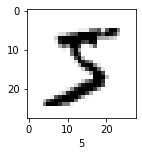

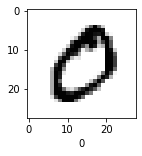

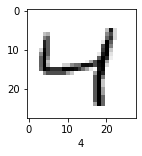

In [40]:
for index in range(0,3):
  plot_sample(X_train,y_train,index)

In [41]:
from keras import models         #importing models package from Keras
from keras import Sequential     #importing Sequential package from Keras to create a Sequential model
from keras import layers         #importing layers package from Keras which will be used for adding Input Layers, Hidden Layers & Output Layers
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping  #importing EarlyStopping package from Keras Callbacks
from keras.callbacks import ModelCheckpoint   #importing ModelCheckPoint library from keras.callback

In [42]:
model_es = Sequential()

model_es.add(layers.Flatten(input_shape=(28,28)))
model_es.add(Dense(100,activation='relu'))
model_es.add(Dense(80,activation='relu'))
model_es.add(Dense(60,activation='relu'))
model_es.add(Dense(10,activation='softmax'))

model_es.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_es.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_20 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_21 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                610       
Total params: 92,050
Trainable params: 92,050
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.8133 - acc: 0.7832 - val_loss: 0.3212 - val_acc: 0.9132

Epoch 00001: val_acc improved from -inf to 0.91320, saving model to best_model.h5
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2598 - acc: 0.9284 - val_loss: 0.2226 - val_acc: 0.9382

Epoch 00002: val_acc improved from 0.91320 to 0.93820, saving model to best_model.h5
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1836 - acc: 0.9482 - val_loss: 0.1562 - val_acc: 0.9564

Epoch 00003: val_acc improved from 0.93820 to 0.95640, saving model to best_model.h5
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1513 - acc: 0.9545 - val_loss: 0.2207 - val_acc: 0.9390

Epoch 00004: val_acc did not improve from 0.95640
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1225 - acc: 0.9645 - val_loss: 0.1444 - val_acc: 0.9638

Epoch 00005: val_acc im

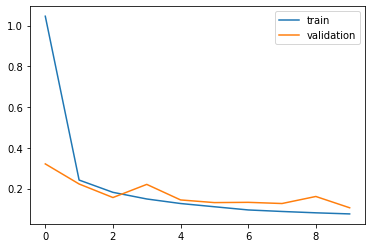

In [43]:
from keras.models import load_model

es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=1)
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

history_es_cp = model_es.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),callbacks=[es,cp])
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.

saved_model = load_model('best_model.h5')

_, train_acc = saved_model.evaluate(X_train,y_train,verbose=0)
_, validation_acc = saved_model.evaluate(X_validation,y_validation,verbose=0)

print('Train: %3f, Validation: %3f' % (train_acc,validation_acc))
print('\n')
#plot to see training & test loss
plt.plot(history_es_cp.history['loss'],label='train')
plt.plot(history_es_cp.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [44]:
model_es_cp_do = Sequential()

model_es_cp_do.add(layers.Flatten(input_shape=(28,28)))
model_es_cp_do.add(Dense(100,activation='relu')), Dropout(0.25)
model_es_cp_do.add(Dense(80,activation='relu')), Dropout(0.25)
model_es_cp_do.add(Dense(60,activation='relu')), Dropout(0.25)
model_es_cp_do.add(Dense(10,activation='softmax')), Dropout(0.25)

model_es_cp_do.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model_es_cp_do.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_24 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_25 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                610       
Total params: 92,050
Trainable params: 92,050
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3.1589 - acc: 0.7843 - val_loss: 0.2703 - val_acc: 0.9242

Epoch 00001: val_acc improved from -inf to 0.92420, saving model to best_model.h5
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2510 - acc: 0.9313 - val_loss: 0.2451 - val_acc: 0.9308

Epoch 00002: val_acc improved from 0.92420 to 0.93080, saving model to best_model.h5
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1884 - acc: 0.9462 - val_loss: 0.1830 - val_acc: 0.9516

Epoch 00003: val_acc improved from 0.93080 to 0.95160, saving model to best_model.h5
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1511 - acc: 0.9566 - val_loss: 0.1602 - val_acc: 0.9544

Epoch 00004: val_acc improved from 0.95160 to 0.95440, saving model to best_model.h5
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1201 - acc: 0.9667 - val_loss: 0.1502 - val_a

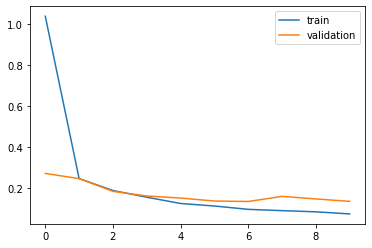

In [45]:
from keras.models import load_model

es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=1)
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=1,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

history_es_cp_do = model_es_cp_do.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),callbacks=[es,cp])
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.

saved_model = load_model('best_model.h5')

_, train_acc = saved_model.evaluate(X_train,y_train,verbose=0)
_, validation_acc = saved_model.evaluate(X_validation,y_validation,verbose=0)

print('Train: %3f, Validation: %3f' % (train_acc,validation_acc))
print('\n')
#plot to see training & test loss
plt.plot(history_es_cp_do.history['loss'],label='train')
plt.plot(history_es_cp_do.history['val_loss'],label='validation')
plt.legend()
plt.show()

* Using 25% dropout and callbacks of ModelCheckPoint & EarlyStopping we can say that the validation loss has decreased and is now 0.1226 with an accuracy of 97%

In [46]:
predictions_es_cp_do = model_es_cp_do.predict(X_test) #predicting value using the Early Stopping model.

In [47]:
predictions_es_cp_do[0] # this gives the one hot encoding value of the target variable for the provided index.
print("Predicted Value of {} image from Test Data is: {}".format(0,np.argmax(predictions_es_cp_do[0]))) #this gives the value of prediction.
print("Actual value of {} image is: {}".format(0,y_test[0])) #this gives the actual value

Predicted Value of 0 image from Test Data is: 5
Actual value of 0 image is: 5


In [48]:
_, test_acc = saved_model.evaluate(X_test,y_test,verbose=0)
print('Test Accuracy is: %3f' % (test_acc))

Test Accuracy is: 0.964800


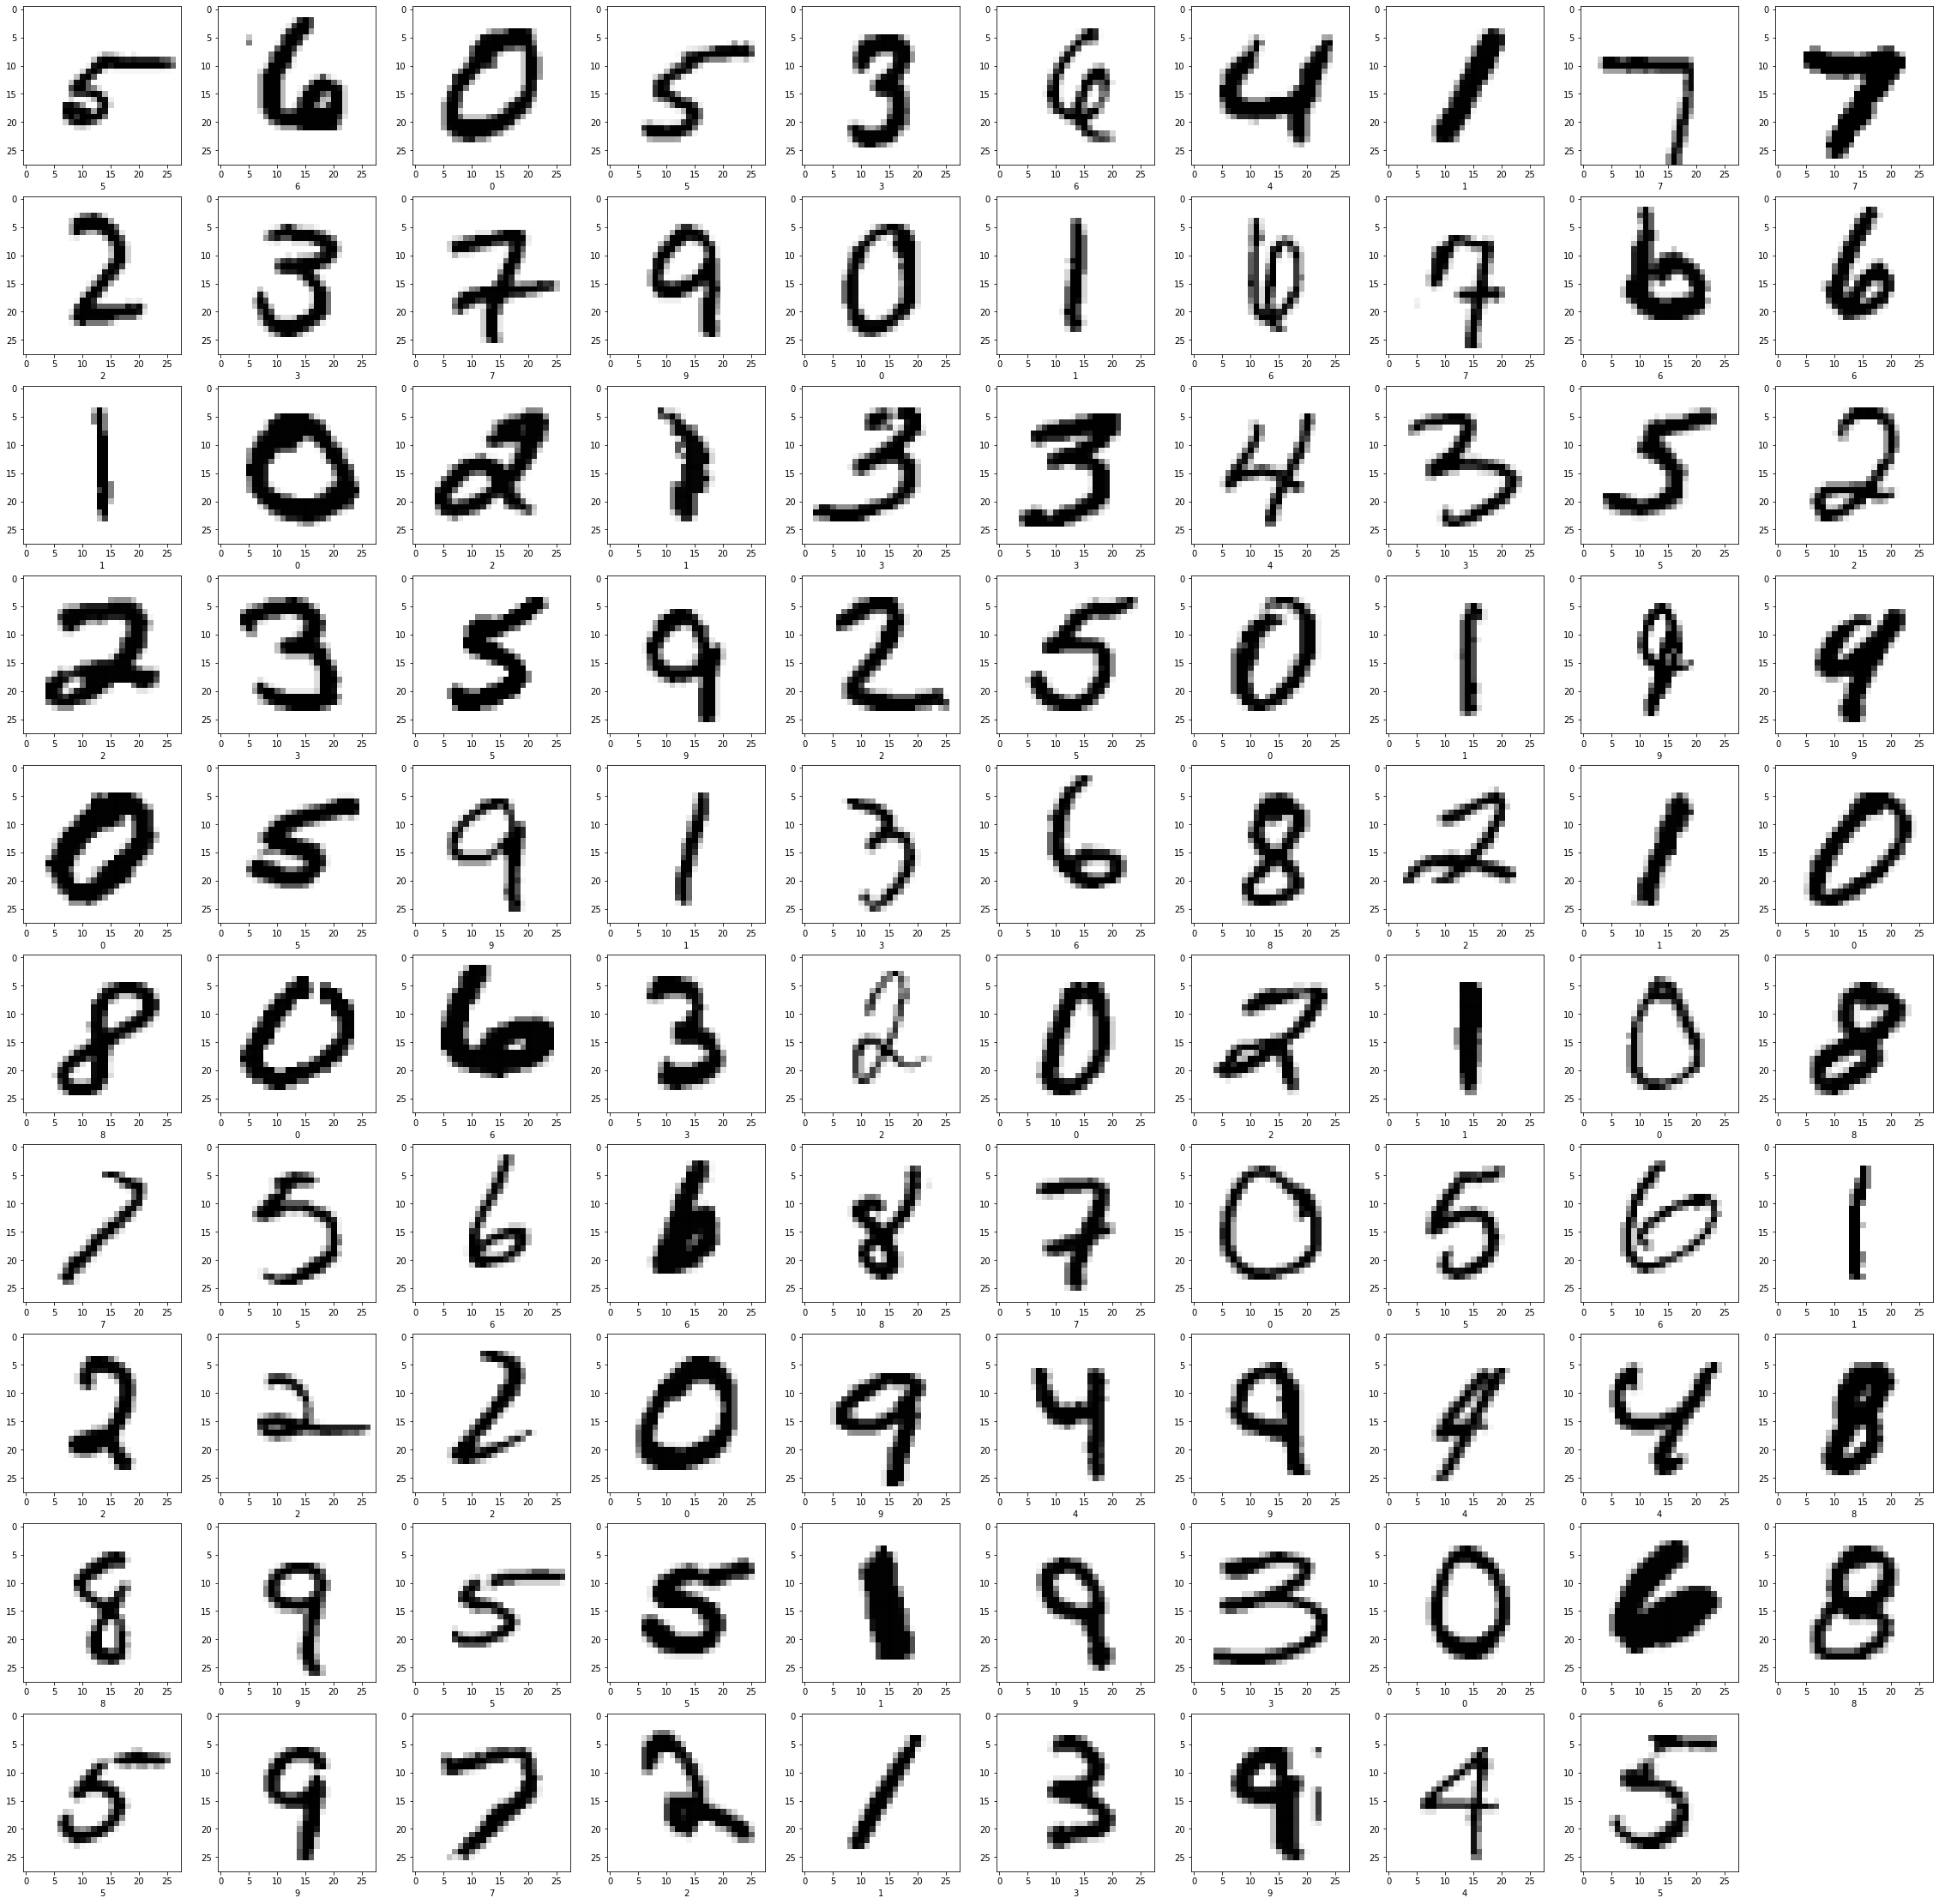

In [69]:
#printing first 3 images from the training dataset by calling the above created function. Here image is from our prediction & Label on x-axis is actual value.
plt.figure(figsize=(40,40))
for index in range(99):  
  plt.subplot(10,10,index+1)
  plt.imshow(X_test[index],cmap=plt.cm.binary)
  plt.xlabel(y_test[index])
plt.show()

### Conclusion

* This shows that the first 10 predicted values are absolutely correct and the overall Test accuracy is 97%.